### Sentiment Analysis Visualization of Worldwide Twitter Data about 4 COVID-19 vaccines

**Original Author:** Susan Li.<br/>
**Additional Info:** Building A Linear Regression with PySpark and MLlib. https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a<br/>
**Last Modified:** Team Böhm 30.06.2021

In [27]:
#preparation
import findspark
findspark.init("/usr/local/spark/")

from pyspark.sql import SparkSession
spark = SparkSession.builder \
   .master("local") \
   .appName("experiment") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()

In [28]:
# Install the findspark module
import sys
!{sys.executable} -m pip install findspark

In [29]:
# Install the pyspark module
!{sys.executable} -m pip install pyspark

In [30]:
#building the schema for our pyspark dataframe
import pyspark.sql.functions as F
from pyspark.sql import SQLContext
from pyspark.sql.types import *
sqlContext = SQLContext(spark)

customSchema = StructType([ \
StructField("text", StringType(), True), \
StructField("date", StringType(), True), \
StructField("location", StringType(), True), \
StructField("polarity", StringType(), True), \
StructField("subjectivity", StringType(), True), \
StructField("classification", StringType(), True)])

In [31]:
try: 
    df_jj = spark.read.format("csv") \
       .option("header", "true") \
       .option("sep",",") \
       .schema(customSchema) \
       .load('/home/jovyan/dp2-2021s-teamboehm/Test/TestCombine/johnson_combined.csv') 


    df_moderna = spark.read.format("csv") \
       .option("header", "true") \
       .option("sep",",") \
       .schema(customSchema) \
       .load('/home/jovyan/dp2-2021s-teamboehm/Test/TestCombine/moderna_combined.csv') 


    df_pfizer = spark.read.format("csv") \
       .option("header", "true") \
       .option("sep",",") \
       .schema(customSchema) \
       .load('/home/jovyan/dp2-2021s-teamboehm/Test/TestCombine/pfizer_combined.csv') 


    df_astraz = spark.read.format("csv") \
       .option("header", "true") \
       .option("sep",",") \
       .schema(customSchema) \
       .load('/home/jovyan/dp2-2021s-teamboehm/Test/TestCombine/astraz_combined.csv')

    df_jj.show(5)
    df_moderna.show(5)
    df_pfizer.show(5)
    df_astraz.show(5)
except: 
    print("Unexpected error:", sys.exc_info()[0])

+--------------------+--------------------+--------------+--------+------------+--------------+
|                text|                date|      location|polarity|subjectivity|classification|
+--------------------+--------------------+--------------+--------+------------+--------------+
|💉 Community phar...|Fri Jul 02 08:04:...|Kerry, Ireland|     0.0|         0.0|       Neutral|
|⚡️ Pharmacies can...|                null|          null|    null|        null|          null|
| on Morning Irela...|Fri Jul 02 08:04:...|       Ireland|     0.0|         0.0|       Neutral|
|💉 And then from ...|                null|          null|    null|        null|          null|
|18-34 year olds c...|Fri Jul 02 08:05:...|       Ireland|     0.0|         0.0|       Neutral|
+--------------------+--------------------+--------------+--------+------------+--------------+
only showing top 5 rows

+--------------------+--------------------+--------------------+--------+------------+--------------+
|          

In [32]:
try:
    #remove all observations that include null
    df_jj = df_jj.na.drop("any")
    df_moderna = df_moderna.na.drop("any")
    df_pfizer = df_pfizer.na.drop("any")
    df_astraz = df_astraz.na.drop("any")
    df_jj.show(5)
except: 
    print("Unexpected error:", sys.exc_info()[0])

+--------------------+--------------------+--------------------+--------+------------+--------------+
|                text|                date|            location|polarity|subjectivity|classification|
+--------------------+--------------------+--------------------+--------+------------+--------------+
|💉 Community phar...|Fri Jul 02 08:04:...|      Kerry, Ireland|     0.0|         0.0|       Neutral|
| on Morning Irela...|Fri Jul 02 08:04:...|             Ireland|     0.0|         0.0|       Neutral|
|18-34 year olds c...|Fri Jul 02 08:05:...|             Ireland|     0.0|         0.0|       Neutral|
|* 18-34-year-olds...|Fri Jul 02 08:05:...|     Dublin, Ireland|   0.375|       0.875|      Positive|
|* 18-34-year-olds...|Fri Jul 02 08:05:...|Dublin City, Ireland|   0.375|       0.875|      Positive|
+--------------------+--------------------+--------------------+--------+------------+--------------+
only showing top 5 rows



In [33]:
#converting the dates from the date column into pyspark date-format
try:
    from pyspark.sql.functions import to_date
    df_jj = df_jj.withColumn("date", F.to_date(F.substring("date",5,100),"MMM dd HH:mm:ss xx yyyy"))
    df_moderna = df_moderna.withColumn("date", F.to_date(F.substring("date",5,100),"MMM dd HH:mm:ss xx yyyy"))
    df_pfizer = df_pfizer.withColumn("date", F.to_date(F.substring("date",5,100),"MMM dd HH:mm:ss xx yyyy")) 
    df_astraz = df_astraz.withColumn("date", F.to_date(F.substring("date",5,100),"MMM dd HH:mm:ss xx yyyy"))
    df_astraz.show(5) 
except: 
    print("Unexpected error:", sys.exc_info()[0])

+--------------------+----------+--------------------+--------------------+-------------------+--------------+
|                text|      date|            location|            polarity|       subjectivity|classification|
+--------------------+----------+--------------------+--------------------+-------------------+--------------+
|vaccinations Astr...|2021-06-28|Terrigal, Central...|                 0.0|                0.0|       Neutral|
|Disgraceful negle...|2021-06-28| Melbourne, Victoria|-0.16666666666666666|0.06666666666666667|      Negative|
|Breaking National...|2021-06-28|Melbourne / Kuala...|                 0.0|                0.0|       Neutral|
|This is great but...|2021-06-28|Sydney, New South...|  0.3666666666666667|               0.45|      Positive|
|The Prime Ministe...|2021-06-28|               Nanya|-0.24375000000000002|               0.65|      Negative|
+--------------------+----------+--------------------+--------------------+-------------------+--------------+
o

In [34]:
try:
    #remove all observations that include null/did not match the date format
    df_jj = df_jj.na.drop("any")
    df_moderna = df_moderna.na.drop("any")
    df_pfizer = df_pfizer.na.drop("any")
    df_astraz = df_astraz.na.drop("any")
    df_pfizer.show(5)
except: 
    print("Unexpected error:", sys.exc_info()[0])

+--------------------+----------+--------------------+--------------------+-------------------+--------------+
|                text|      date|            location|            polarity|       subjectivity|classification|
+--------------------+----------+--------------------+--------------------+-------------------+--------------+
|Pfizer and Modern...|2021-06-29|            Houilles| 0.13636363636363635|0.45454545454545453|      Positive|
|About half of adu...|2021-06-29|      Greenville, SC|-0.16666666666666666|0.16666666666666666|      Negative|
|I booked in two P...|2021-06-29|Bathtub full of piss|                 0.0|                0.0|       Neutral|
|Rollout of the se...|2021-06-29|Pretoria, South A...|           -0.078125|           0.421875|      Negative|
|The Pfizer &amp; ...|2021-06-29|pinging off cell ...|                 0.8|               0.75|      Positive|
+--------------------+----------+--------------------+--------------------+-------------------+--------------+
o

In [35]:
try:
    df_jj = df_jj.orderBy("date") 
    df_jj = df_jj.withColumn("polarity", df_jj.polarity.cast("float")) #converting from string to float
    df_jj = df_jj.withColumn("subjectivity", df_jj.subjectivity.cast("float")) #converting from string to float

    df_moderna = df_moderna.orderBy("date") 
    df_moderna = df_moderna.withColumn("polarity", df_moderna.polarity.cast("float")) #converting from string to float
    df_moderna = df_moderna.withColumn("subjectivity", df_moderna.subjectivity.cast("float")) #converting from string to float

    df_pfizer = df_pfizer.orderBy("date") 
    df_pfizer = df_pfizer.withColumn("polarity", df_pfizer.polarity.cast("float")) #converting from string to float
    df_pfizer = df_pfizer.withColumn("subjectivity", df_pfizer.subjectivity.cast("float")) #converting from string to float

    df_astraz = df_astraz.orderBy("date") 
    df_astraz = df_astraz.withColumn("polarity", df_astraz.polarity.cast("float")) #converting from string to float
    df_astraz = df_astraz.withColumn("subjectivity", df_astraz.subjectivity.cast("float")) #converting from string to float

    df_moderna.show(5)
except: 
    print("Unexpected error:", sys.exc_info()[0])

+--------------------+----------+--------------------+--------+------------+--------------+
|                text|      date|            location|polarity|subjectivity|classification|
+--------------------+----------+--------------------+--------+------------+--------------+
|The Pfizer-BioNTe...|2021-06-28|Johannesburg, Sou...|     0.5|         0.5|      Positive|
|Pfizer and Modern...|2021-06-28|       United States|    0.35|        0.65|      Positive|
|The Pfizer-BioNTe...|2021-06-28|              Mexico|     0.5|         0.5|      Positive|
|Great news — Pfiz...|2021-06-28|               World|     0.8|        0.75|      Positive|
|The Pfizer-BioNTe...|2021-06-28|Südlich von Münch...|     0.5|         0.5|      Positive|
+--------------------+----------+--------------------+--------+------------+--------------+
only showing top 5 rows



In [36]:
try:
    avg_pol_jj = df_jj.groupBy("date").avg("polarity") #average polarity per day
    avg_sub_jj = df_jj.groupBy("date").avg("subjectivity") #average subjectivity per day

    avg_pol_moderna = df_moderna.groupBy("date").avg("polarity") #average polarity per day
    avg_sub_moderna = df_moderna.groupBy("date").avg("subjectivity") #average subjectivity per day

    avg_pol_pfizer = df_pfizer.groupBy("date").avg("polarity") #average polarity per day
    avg_sub_pfizer = df_pfizer.groupBy("date").avg("subjectivity") #average subjectivity per day

    avg_pol_astraz = df_astraz.groupBy("date").avg("polarity") #average polarity per day
    avg_sub_astraz = df_astraz.groupBy("date").avg("subjectivity") #average subjectivity per day

    avg_pol_moderna.show()
    avg_sub_moderna.show()
except: 
    print("Unexpected error:", sys.exc_info()[0])

+----------+-------------------+
|      date|      avg(polarity)|
+----------+-------------------+
|2021-06-28|0.30244769265076943|
|2021-06-30|0.13704024768026357|
|2021-07-01|0.11683990602051059|
|2021-07-02|0.14245573602250364|
+----------+-------------------+

+----------+-------------------+
|      date|  avg(subjectivity)|
+----------+-------------------+
|2021-06-28|0.42657741191131726|
|2021-06-30| 0.3656888902605919|
|2021-07-01| 0.3089665500947865|
|2021-07-02| 0.3041775196057851|
+----------+-------------------+



In [37]:
try:
    ### vacccination data ###
    vacs = spark.read.csv("/home/jovyan/dp2-2021s-teamboehm/Test/TestCombine/vacc_data.csv", header = True)

    df_vaccinations = vacs.select(vacs.location, vacs.date, vacs.daily_vaccinations) #selecting the columns needed
    df_vaccinations.dtypes #all our columns are strings, we need the date to be in a date format

    df_vaccinations = df_vaccinations.withColumn("date", to_date(df_vaccinations.date, "yyyy-MM-dd")) #converting to date format
    df_vaccinations = df_vaccinations.withColumn("daily_vaccinations", df_vaccinations.daily_vaccinations.cast(DoubleType()))
    df_vaccinations.select("date").dtypes #checking whether it worked 
    df_vaccinations.select("daily_vaccinations").dtypes
    df_vaccinations = df_vaccinations.where("date BETWEEN '2021-06-28' AND '2021-07-02'") #filter for the dates we want

    countries = ["United States", "United Kingdom", "World"] #countries we are focusing on
    df_vaccinations = df_vaccinations.filter(df_vaccinations.location.isin(countries)) #filtering for the countries
    df_vaccinations.show()
except: 
    print("Unexpected error:", sys.exc_info()[0])

+--------------+----------+------------------+
|      location|      date|daily_vaccinations|
+--------------+----------+------------------+
|United Kingdom|2021-06-28|          380779.0|
|United Kingdom|2021-06-29|          343345.0|
|United Kingdom|2021-06-30|          334964.0|
|United Kingdom|2021-07-01|          327284.0|
|United Kingdom|2021-07-02|          313838.0|
| United States|2021-06-28|          833990.0|
| United States|2021-06-29|          847000.0|
| United States|2021-06-30|          949925.0|
| United States|2021-07-01|         1066443.0|
| United States|2021-07-02|         1087156.0|
|         World|2021-06-28|        4.216919E7|
|         World|2021-06-29|         4.20655E7|
|         World|2021-06-30|       4.1077226E7|
|         World|2021-07-01|        4.078976E7|
|         World|2021-07-02|       3.8845746E7|
+--------------+----------+------------------+



In [38]:
try:
    #every brand's polarity + subjectivity + daily vaccinations
    world_vacc = df_vaccinations.filter(df_vaccinations.location == "World")

    inner_join1 = world_vacc.join(avg_pol_jj, ["date"])
    final_df_jj = inner_join1.join(avg_sub_jj,["date"])

    inner_join2 = world_vacc.join(avg_pol_moderna, ["date"])
    final_df_moderna = inner_join2.join(avg_sub_moderna,["date"])

    inner_join3 = world_vacc.join(avg_pol_pfizer, ["date"])
    final_df_pfizer = inner_join3.join(avg_sub_pfizer,["date"])

    inner_join4 = world_vacc.join(avg_pol_astraz, ["date"])
    final_df_astraz = inner_join4.join(avg_sub_astraz,["date"])

    final_df_moderna.show()
except: 
    print("Unexpected error:", sys.exc_info()[0])

+----------+--------+------------------+-------------------+-------------------+
|      date|location|daily_vaccinations|      avg(polarity)|  avg(subjectivity)|
+----------+--------+------------------+-------------------+-------------------+
|2021-06-28|   World|        4.216919E7|0.30244769265076943|0.42657741191131726|
|2021-06-30|   World|       4.1077226E7|0.13704024768026357| 0.3656888902605919|
|2021-07-01|   World|        4.078976E7|0.11683990602051059| 0.3089665500947865|
|2021-07-02|   World|       3.8845746E7|0.14245573602250364| 0.3041775196057851|
+----------+--------+------------------+-------------------+-------------------+



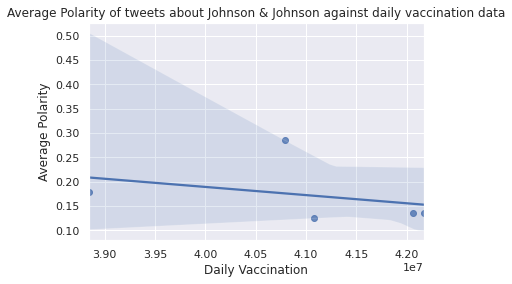

In [39]:
try:
    import pandas as pd
    import matplotlib as plt
    import seaborn as snb
    import os
    os.chdir("/home/jovyan/dp2-2021s-teamboehm/Test/TestCombine")

    snb.set()
    scatterplot_jj = final_df_jj.toPandas() 
    scatterplot_jj_plot = snb.regplot(x = "daily_vaccinations", y = "avg(polarity)", data = scatterplot_jj)
    scatterplot_jj_plot.set_title("Average Polarity of tweets about Johnson & Johnson against daily vaccination data")
    scatterplot_jj_plot.set_xlabel("Daily Vaccination")
    scatterplot_jj_plot.set_ylabel("Average Polarity")
    fig = scatterplot_jj_plot.get_figure()
    fig.savefig("scatterplot_jj.png", bbox_inches='tight')
except: 
    print("Unexpected error:", sys.exc_info()[0])

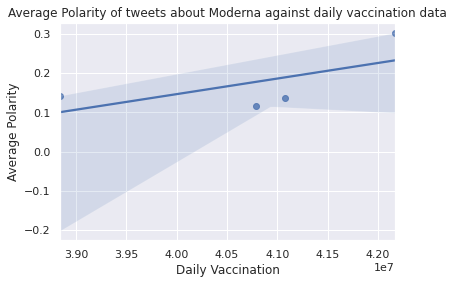

In [40]:
try:
    snb.set()
    scatterplot_moderna = final_df_moderna.toPandas()
    scatterplot_moderna_plot = snb.regplot(x = "daily_vaccinations", y = "avg(polarity)", data = scatterplot_moderna)
    scatterplot_moderna_plot.set_title("Average Polarity of tweets about Moderna against daily vaccination data")
    scatterplot_moderna_plot.set_xlabel("Daily Vaccination")
    scatterplot_moderna_plot.set_ylabel("Average Polarity")
    fig = scatterplot_moderna_plot.get_figure()
    fig.savefig("scatterplot_moderna.png", bbox_inches='tight')
except: 
    print("Unexpected error:", sys.exc_info()[0])

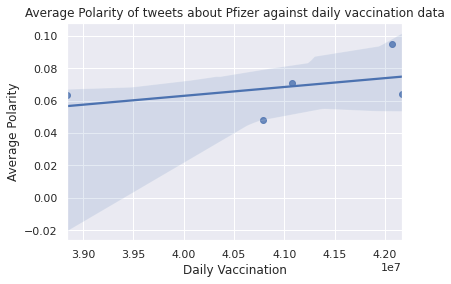

In [41]:
try:
    snb.set()
    scatterplot_pfizer = final_df_pfizer.toPandas() 
    scatterplot_pfizer_plot = snb.regplot(x = "daily_vaccinations", y = "avg(polarity)", data = scatterplot_pfizer)
    scatterplot_pfizer_plot.set_title("Average Polarity of tweets about Pfizer against daily vaccination data")
    scatterplot_pfizer_plot.set_xlabel("Daily Vaccination")
    scatterplot_pfizer_plot.set_ylabel("Average Polarity")
    fig = scatterplot_pfizer_plot.get_figure()
    fig.savefig("scatterplot_pfizer.png", bbox_inches='tight')
except: 
    print("Unexpected error:", sys.exc_info()[0])

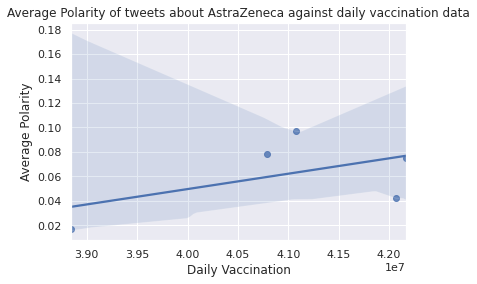

In [42]:
try:
    snb.set()
    scatterplot_astraz = final_df_astraz.toPandas() 
    scatterplot_astraz_plot = snb.regplot(x = "daily_vaccinations", y = "avg(polarity)", data = scatterplot_astraz)
    scatterplot_astraz_plot.set_title("Average Polarity of tweets about AstraZeneca against daily vaccination data")
    scatterplot_astraz_plot.set_xlabel("Daily Vaccination")
    scatterplot_astraz_plot.set_ylabel("Average Polarity")
    fig = scatterplot_astraz_plot.get_figure()
    fig.savefig("scatterplot_astraz.png", bbox_inches='tight')
except: 
    print("Unexpected error:", sys.exc_info()[0])

In [43]:
import numpy as np
fill_df = spark.createDataFrame([("2021-06-29", np.nan, np.nan),], ["date", "avg(polarity)", "avg(subjectivity)"])
fill_df = fill_df.withColumn('date', to_date(fill_df.date, 'yyyy-MM-dd')) #converting to date format
fill_df.show()
fill_df.printSchema()

+----------+-------------+-----------------+
|      date|avg(polarity)|avg(subjectivity)|
+----------+-------------+-----------------+
|2021-06-29|          NaN|              NaN|
+----------+-------------+-----------------+

root
 |-- date: date (nullable = true)
 |-- avg(polarity): double (nullable = true)
 |-- avg(subjectivity): double (nullable = true)



In [44]:
final_df_moderna2 = world_vacc.join(fill_df,["date"])
final_df_moderna2.show()

+----------+--------+------------------+-------------+-----------------+
|      date|location|daily_vaccinations|avg(polarity)|avg(subjectivity)|
+----------+--------+------------------+-------------+-----------------+
|2021-06-29|   World|         4.20655E7|          NaN|              NaN|
+----------+--------+------------------+-------------+-----------------+



In [45]:
final_df_moderna22 = final_df_moderna.union(final_df_moderna2)
final_df_moderna22 = final_df_moderna22.orderBy("date") 
final_df_moderna22.show()
final_df_moderna22.printSchema()

+----------+--------+------------------+-------------------+-------------------+
|      date|location|daily_vaccinations|      avg(polarity)|  avg(subjectivity)|
+----------+--------+------------------+-------------------+-------------------+
|2021-06-28|   World|        4.216919E7|0.30244769265076943|0.42657741191131726|
|2021-06-29|   World|         4.20655E7|                NaN|                NaN|
|2021-06-30|   World|       4.1077226E7|0.13704024768026357| 0.3656888902605919|
|2021-07-01|   World|        4.078976E7|0.11683990602051059| 0.3089665500947865|
|2021-07-02|   World|       3.8845746E7|0.14245573602250364| 0.3041775196057851|
+----------+--------+------------------+-------------------+-------------------+

root
 |-- date: date (nullable = true)
 |-- location: string (nullable = true)
 |-- daily_vaccinations: double (nullable = true)
 |-- avg(polarity): double (nullable = true)
 |-- avg(subjectivity): double (nullable = true)



In [46]:
#Converting the dataframe into pandas - since this is used for visualization purposes only, we should be allowed to do this I guess
'''
https://stackoverflow.com/questions/44032771/fill-cell-containing-nan-with-average-of-value-before-and-after
'''

moderna_pandas = final_df_moderna22.toPandas()

moderna_pandas = moderna_pandas.rename({'avg(polarity)': 'avgpol', 'avg(subjectivity)': 'avgsub'}, axis=1)

moderna_pandas.avgpol = moderna_pandas.avgpol.fillna((moderna_pandas.avgpol.shift() + moderna_pandas.avgpol.shift(-1))/2)
moderna_pandas.avgsub = moderna_pandas.avgsub.fillna((moderna_pandas.avgsub.shift() + moderna_pandas.avgsub.shift(-1))/2)

moderna_pandas = moderna_pandas.rename({'avgpol': 'avg(polarity)', 'avgsub': 'avg(subjectivity)'}, axis=1)

without_missing_moderna = spark.createDataFrame(moderna_pandas) 
without_missing_moderna.show()

+----------+--------+------------------+-------------------+-------------------+
|      date|location|daily_vaccinations|      avg(polarity)|  avg(subjectivity)|
+----------+--------+------------------+-------------------+-------------------+
|2021-06-28|   World|        4.216919E7|0.30244769265076943|0.42657741191131726|
|2021-06-29|   World|         4.20655E7| 0.2197439701655165| 0.3961331510859546|
|2021-06-30|   World|       4.1077226E7|0.13704024768026357| 0.3656888902605919|
|2021-07-01|   World|        4.078976E7|0.11683990602051059| 0.3089665500947865|
|2021-07-02|   World|       3.8845746E7|0.14245573602250364| 0.3041775196057851|
+----------+--------+------------------+-------------------+-------------------+



In [47]:
avg_pol_moderna = without_missing_moderna.select(["date", "avg(polarity)"])
avg_pol_moderna.show()

+----------+-------------------+
|      date|      avg(polarity)|
+----------+-------------------+
|2021-06-28|0.30244769265076943|
|2021-06-29| 0.2197439701655165|
|2021-06-30|0.13704024768026357|
|2021-07-01|0.11683990602051059|
|2021-07-02|0.14245573602250364|
+----------+-------------------+



In [48]:
try:
    #dataframe for all polarity averages for all vaccine brands worldwide
    avg_join = avg_pol_jj.join(avg_pol_moderna, ["date"])
    avg_join = avg_join.join(avg_pol_pfizer, ["date"])
    avg_join = avg_join.join(avg_pol_astraz, ["date"])

    #renaming the columns
    newColumns = ["date", "Pol_Johnson","Pol_Moderna","Pol_Pfizer","Pol_Astra"]
    avg_pol_join = avg_join.toDF(*newColumns)

    avg_pol_join.show()
except: 
    print("Unexpected error:", sys.exc_info()[0])

+----------+-------------------+-------------------+--------------------+--------------------+
|      date|        Pol_Johnson|        Pol_Moderna|          Pol_Pfizer|           Pol_Astra|
+----------+-------------------+-------------------+--------------------+--------------------+
|2021-06-28| 0.1362268537696865|0.30244769265076943| 0.06443452447031935| 0.07485607158364231|
|2021-06-29|0.13633596620700777| 0.2197439701655165| 0.09523283510341071| 0.04259175155311823|
|2021-06-30|0.12543463531383284|0.13704024768026357| 0.07085266112520987| 0.09746422957074134|
|2021-07-01|  0.285370048477843|0.11683990602051059|0.048385055304742325| 0.07841521609620547|
|2021-07-02| 0.1783385161233536|0.14245573602250364| 0.06326747646160198|0.017145817287457295|
+----------+-------------------+-------------------+--------------------+--------------------+



In [49]:
try:
    ### vacccination data ###
    vacs = spark.read.csv("/home/jovyan/dp2-2021s-teamboehm/Test/TestCombine/vacc_data.csv", header = True)

    df_vaccinations = vacs.select(vacs.location, vacs.date, vacs.daily_vaccinations) #selecting the columns needed
    print(df_vaccinations.dtypes) #all our columns are strings, we need the date to be in a date format

    df_vaccinations = df_vaccinations.withColumn("date", to_date(df_vaccinations.date, "yyyy-MM-dd")) #converting to date format
    df_vaccinations = df_vaccinations.withColumn("daily_vaccinations", df_vaccinations.daily_vaccinations.cast(DoubleType()))
    print(df_vaccinations.dtypes) 
    df_vaccinations.select("date").dtypes #checking whether it worked 
    df_vaccinations = df_vaccinations.where("date BETWEEN '2021-05-01' AND '2021-07-02'") #filter for the dates we want

    countries = ["World"] #countries we are focusing on
    df_vaccinations = df_vaccinations.filter(df_vaccinations.location.isin(countries)) #filtering for the countries
    df_vaccinations.show()
except: 
    print("Unexpected error:", sys.exc_info()[0])

[('location', 'string'), ('date', 'string'), ('daily_vaccinations', 'string')]
[('location', 'string'), ('date', 'date'), ('daily_vaccinations', 'double')]
+--------+----------+------------------+
|location|      date|daily_vaccinations|
+--------+----------+------------------+
|   World|2021-05-01|       2.0757424E7|
|   World|2021-05-02|       1.9745126E7|
|   World|2021-05-03|       1.9295379E7|
|   World|2021-05-04|       1.9173938E7|
|   World|2021-05-05|       1.8422374E7|
|   World|2021-05-06|       1.8333801E7|
|   World|2021-05-07|       1.8524066E7|
|   World|2021-05-08|       1.9191999E7|
|   World|2021-05-09|       1.9696762E7|
|   World|2021-05-10|       2.1035308E7|
|   World|2021-05-11|       2.1895675E7|
|   World|2021-05-12|        2.284485E7|
|   World|2021-05-13|       2.3293642E7|
|   World|2021-05-14|       2.3241754E7|
|   World|2021-05-15|       2.3766616E7|
|   World|2021-05-16|       2.4874415E7|
|   World|2021-05-17|       2.5453609E7|
|   World|2021-05-18|   

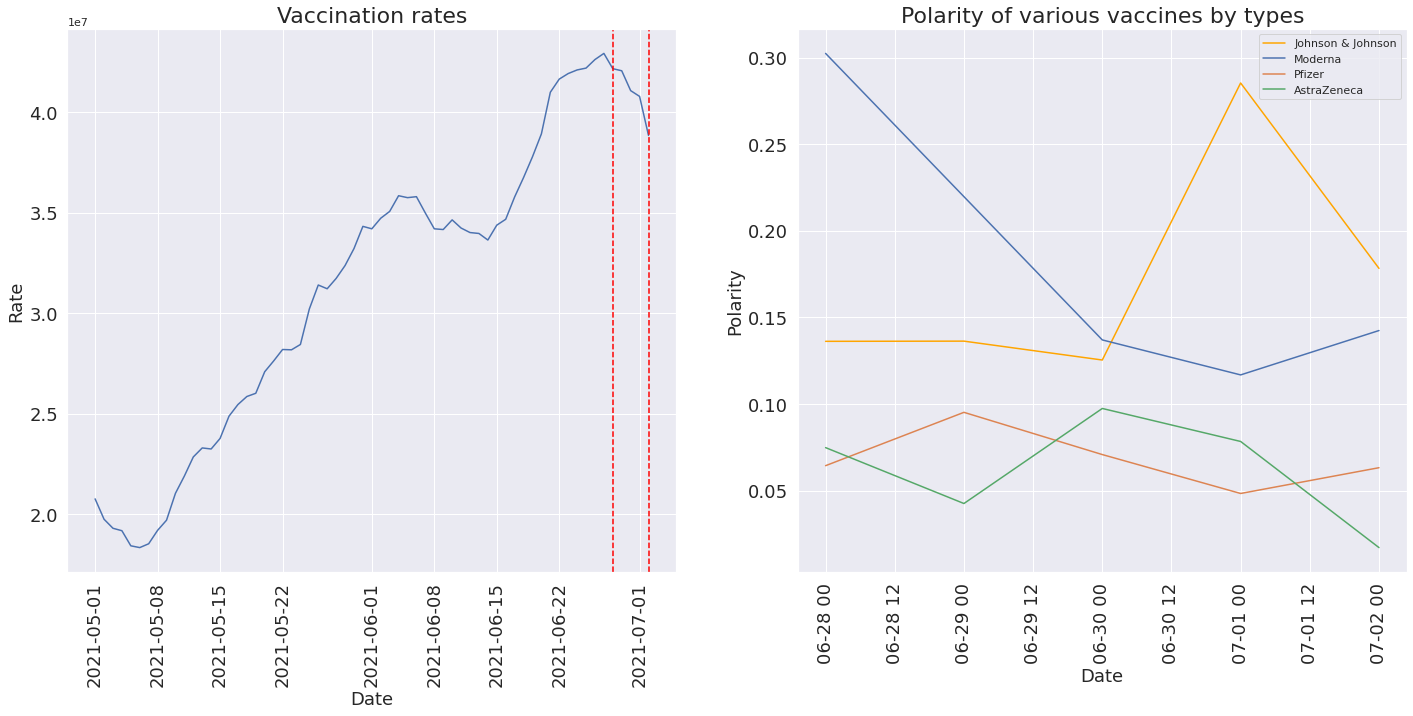

In [50]:
try:
    from matplotlib import *
    import sys
    from pylab import *

    df_vaccinations_pd = df_vaccinations.toPandas()
    avg_pol_join_pd = avg_pol_join.toPandas()
    plt.figure(figsize=(24, 10))       
    plt.subplot(1,2,1)
    plt.plot(df_vaccinations_pd["date"], df_vaccinations_pd["daily_vaccinations"])
    plt.axvline(x='2021-06-28', color='red', linestyle='dashed')
    plt.axvline(x='2021-07-02', color='red', linestyle='dashed')
    plt.xticks(rotation = 90, fontsize=18)
    plt.yticks(fontsize=18)
    plt.title("Vaccination rates", fontsize=22)
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("Rate", fontsize=18)

    plt.subplot(1,2,2)
    plt.plot(avg_pol_join_pd["date"],avg_pol_join_pd["Pol_Johnson"], label = "Johnson & Johnson", color = "orange")
    plt.plot(avg_pol_join_pd["date"],avg_pol_join_pd["Pol_Moderna"],label = "Moderna")
    plt.plot(avg_pol_join_pd["date"],avg_pol_join_pd["Pol_Pfizer"], label = "Pfizer")
    plt.plot(avg_pol_join_pd["date"],avg_pol_join_pd["Pol_Astra"], label = "AstraZeneca")
    plt.xticks(rotation = 90, fontsize=18)
    plt.yticks(fontsize=18)
    plt.title("Polarity of various vaccines by types", fontsize=22)
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("Polarity", fontsize=18)

    plt.legend()
    plt.show()
except: 
    print("Unexpected error:", sys.exc_info()[0])

## Linear Regression Models

In [51]:
try:
    final_df_jj = final_df_jj.withColumn("daily_vaccinations", final_df_jj.daily_vaccinations.cast(DoubleType()))
    final_df_moderna = final_df_moderna.withColumn("daily_vaccinations", final_df_moderna.daily_vaccinations.cast(DoubleType()))
    final_df_pfizer = final_df_pfizer.withColumn("daily_vaccinations", final_df_pfizer.daily_vaccinations.cast(DoubleType()))
    final_df_astraz = final_df_astraz.withColumn("daily_vaccinations", final_df_astraz.daily_vaccinations.cast(DoubleType()))
except: 
    print("Unexpected error:", sys.exc_info()[0])

In [52]:
try:
    final_df_jj.printSchema()
    final_df_moderna.printSchema()
    final_df_pfizer.printSchema()
    final_df_astraz.printSchema()
except: 
    print("Unexpected error:", sys.exc_info()[0])

root
 |-- date: date (nullable = true)
 |-- location: string (nullable = true)
 |-- daily_vaccinations: double (nullable = true)
 |-- avg(polarity): double (nullable = true)
 |-- avg(subjectivity): double (nullable = true)

root
 |-- date: date (nullable = true)
 |-- location: string (nullable = true)
 |-- daily_vaccinations: double (nullable = true)
 |-- avg(polarity): double (nullable = true)
 |-- avg(subjectivity): double (nullable = true)

root
 |-- date: date (nullable = true)
 |-- location: string (nullable = true)
 |-- daily_vaccinations: double (nullable = true)
 |-- avg(polarity): double (nullable = true)
 |-- avg(subjectivity): double (nullable = true)

root
 |-- date: date (nullable = true)
 |-- location: string (nullable = true)
 |-- daily_vaccinations: double (nullable = true)
 |-- avg(polarity): double (nullable = true)
 |-- avg(subjectivity): double (nullable = true)



In [53]:
'''
https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
'''
# descriptive statistics
final_df_jj.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
location,5,None,None,World,World
daily_vaccinations,5,4.09894844E7,1340962.1197180774,3.8845746E7,4.216919E7
avg(polarity),5,0.17234120397834474,0.06635574026355805,0.12543463531383284,0.285370048477843
avg(subjectivity),5,0.34732877675665363,0.12190825501765298,0.24111809740041165,0.5165258692728506


In [54]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    import six

    for i in final_df_jj.columns:
        if i != "date":
            if not(isinstance(final_df_jj.select(i).take(1)[0][0], six.string_types)):
                print("Correlation to Daily Vaccination Rates for", i, final_df_jj.stat.corr('daily_vaccinations',i))
except: 
    print("Unexpected error:", sys.exc_info()[0])

Correlation to Daily Vaccination Rates for daily_vaccinations 1.0
Correlation to Daily Vaccination Rates for avg(polarity) -0.3396626121075271
Correlation to Daily Vaccination Rates for avg(subjectivity) -0.6762252579079374


In [55]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    for i in final_df_moderna.columns:
        if i != "date":
            if not(isinstance(final_df_moderna.select(i).take(1)[0][0], six.string_types)):
                print("Correlation to Daily Vaccination Rates for", i, final_df_moderna.stat.corr('daily_vaccinations',i))
except: 
    print("Unexpected error:", sys.exc_info()[0])

Correlation to Daily Vaccination Rates for daily_vaccinations 1.0
Correlation to Daily Vaccination Rates for avg(polarity) 0.6396939146619425
Correlation to Daily Vaccination Rates for avg(subjectivity) 0.8374804041080799


In [56]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    for i in final_df_pfizer.columns:
        if i != "date":
            if not(isinstance(final_df_pfizer.select(i).take(1)[0][0], six.string_types)):
                print("Correlation to Daily Vaccination Rates for", i, final_df_pfizer.stat.corr('daily_vaccinations',i))
except: 
    print("Unexpected error:", sys.exc_info()[0])

Correlation to Daily Vaccination Rates for daily_vaccinations 1.0
Correlation to Daily Vaccination Rates for avg(polarity) 0.4298449862186989
Correlation to Daily Vaccination Rates for avg(subjectivity) 0.3265657070784525


In [57]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    for i in final_df_astraz.columns:
        if i != "date":
            if not(isinstance(final_df_astraz.select(i).take(1)[0][0], six.string_types)):
                print("Correlation to Daily Vaccination Rates for", i, final_df_astraz.stat.corr('daily_vaccinations',i))
except: 
    print("Unexpected error:", sys.exc_info()[0])

Correlation to Daily Vaccination Rates for daily_vaccinations 1.0
Correlation to Daily Vaccination Rates for avg(polarity) 0.5268928297485443
Correlation to Daily Vaccination Rates for avg(subjectivity) 0.22271659767347873


## LR Model of worldwide Johnson & Johnson tweets

In [58]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    from pyspark.ml.feature import VectorAssembler

    vectorAssembler = VectorAssembler(inputCols = ['avg(polarity)'], outputCol = 'features')
    vfinal_df_jj = vectorAssembler.transform(final_df_jj)
    vfinal_df_jj = vfinal_df_jj.select(['features', 'daily_vaccinations'])
    vfinal_df_jj.show()
except: 
    print("Unexpected error:", sys.exc_info()[0])

+--------------------+------------------+
|            features|daily_vaccinations|
+--------------------+------------------+
|[0.1362268537696865]|        4.216919E7|
|[0.13633596620700...|         4.20655E7|
|[0.12543463531383...|       4.1077226E7|
| [0.285370048477843]|        4.078976E7|
|[0.1783385161233536]|       3.8845746E7|
+--------------------+------------------+



In [59]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    # running the Linear regression model
    from pyspark.ml.regression import LinearRegression

    lr = LinearRegression(featuresCol = 'features', labelCol='daily_vaccinations', maxIter=10, regParam=0.3, elasticNetParam=0.8)
    lr_model = lr.fit(vfinal_df_jj)
    print("Coefficients: " + str(lr_model.coefficients))
    print("Intercept: " + str(lr_model.intercept))
except: 
    print("Unexpected error:", sys.exc_info()[0])

Coefficients: [-6864129.665318542]
Intercept: 42172456.770784475


In [60]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    # performance indicators
    trainingSummary = lr_model.summary
    print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
    print("r2: %f" % trainingSummary.r2)
except: 
    print("Unexpected error:", sys.exc_info()[0])

RMSE: 1128085.885926
r2: 0.115371


In [61]:
try:
    # approximately 11.5% of the variability in “daily vaccinations” can be explained by average sentiment polarity

    # RMSE measures the differences between predicted values and actual values. 
    # RMSE alone is meaningless until we compare with the actual “daily_vaccinations” value, such as mean, min and max. 
    # After such comparison, our RMSE looks acceptable with 1128085.885926
    vfinal_df_jj.describe().show()
except: 
    print("Unexpected error:", sys.exc_info()[0])

+-------+------------------+
|summary|daily_vaccinations|
+-------+------------------+
|  count|                 5|
|   mean|      4.09894844E7|
| stddev|1340962.1197180774|
|    min|       3.8845746E7|
|    max|        4.216919E7|
+-------+------------------+



## LR Model of worldwide Moderna tweets

In [62]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    vectorAssembler = VectorAssembler(inputCols = ['avg(polarity)'], outputCol = 'features')
    vfinal_df_moderna = vectorAssembler.transform(final_df_moderna)
    vfinal_df_moderna = vfinal_df_moderna.select(['features', 'daily_vaccinations'])
    vfinal_df_moderna.show()
except: 
    print("Unexpected error:", sys.exc_info()[0])

+--------------------+------------------+
|            features|daily_vaccinations|
+--------------------+------------------+
|[0.30244769265076...|        4.216919E7|
|[0.13704024768026...|       4.1077226E7|
|[0.11683990602051...|        4.078976E7|
|[0.14245573602250...|       3.8845746E7|
+--------------------+------------------+



In [63]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    # running the Linear regression model
    lr = LinearRegression(featuresCol = 'features', labelCol='daily_vaccinations', maxIter=10, regParam=0.3, elasticNetParam=0.8)
    lr_model = lr.fit(vfinal_df_moderna)
    print("Coefficients: " + str(lr_model.coefficients))
    print("Intercept: " + str(lr_model.intercept))
except: 
    print("Unexpected error:", sys.exc_info()[0])

Coefficients: [10308383.599304132]
Intercept: 38919648.19499809


In [64]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    # performance indicators
    trainingSummary = lr_model.summary
    print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
    print("r2: %f" % trainingSummary.r2)
except: 
    print("Unexpected error:", sys.exc_info()[0])

RMSE: 921190.465118
r2: 0.409208


In [65]:
try:
    # approximately 40.9% of the variability in “daily vaccinations” can be explained by average sentiment polarity

    # RMSE measures the differences between predicted values and actual values. 
    # RMSE alone is meaningless until we compare with the actual “daily_vaccinations” value, such as mean, min and max. 
    # After such comparison, our RMSE looks acceptable with 921190.465118
    vfinal_df_moderna.describe().show()
except: 
    print("Unexpected error:", sys.exc_info()[0])

+-------+------------------+
|summary|daily_vaccinations|
+-------+------------------+
|  count|                 4|
|   mean|      4.07204805E7|
| stddev|1383890.1283183575|
|    min|       3.8845746E7|
|    max|        4.216919E7|
+-------+------------------+



## LR Model of worldwide Pfizer tweets

In [66]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    vectorAssembler = VectorAssembler(inputCols = ['avg(polarity)'], outputCol = 'features')
    vfinal_df_pfizer = vectorAssembler.transform(final_df_pfizer)
    vfinal_df_pfizer = vfinal_df_pfizer.select(['features', 'daily_vaccinations'])
    vfinal_df_pfizer.show()
except: 
    print("Unexpected error:", sys.exc_info()[0])


+--------------------+------------------+
|            features|daily_vaccinations|
+--------------------+------------------+
|[0.06443452447031...|        4.216919E7|
|[0.09523283510341...|         4.20655E7|
|[0.07085266112520...|       4.1077226E7|
|[0.04838505530474...|        4.078976E7|
|[0.06326747646160...|       3.8845746E7|
+--------------------+------------------+



In [67]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    # running the Linear regression model
    lr = LinearRegression(featuresCol = 'features', labelCol='daily_vaccinations', maxIter=10, regParam=0.3, elasticNetParam=0.8)
    lr_model = lr.fit(vfinal_df_pfizer)
    print("Coefficients: " + str(lr_model.coefficients))
    print("Intercept: " + str(lr_model.intercept))
except: 
    print("Unexpected error:", sys.exc_info()[0])

Coefficients: [33721819.78863719]
Intercept: 38681748.16982954


In [68]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    # performance indicators
    trainingSummary = lr_model.summary
    print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
    print("r2: %f" % trainingSummary.r2)
except: 
    print("Unexpected error:", sys.exc_info()[0])

RMSE: 1082935.163219
r2: 0.184767


In [69]:
try:
    # approximately 18.5% of the variability in “daily vaccinations” can be explained by average sentiment polarity

    # RMSE measures the differences between predicted values and actual values. 
    # RMSE alone is meaningless until we compare with the actual “daily_vaccinations” value, such as mean, min and max. 
    # After such comparison, our RMSE looks acceptable with 1082935.163219
    vfinal_df_pfizer.describe().show()
except: 
    print("Unexpected error:", sys.exc_info()[0])

+-------+------------------+
|summary|daily_vaccinations|
+-------+------------------+
|  count|                 5|
|   mean|      4.09894844E7|
| stddev|1340962.1197180774|
|    min|       3.8845746E7|
|    max|        4.216919E7|
+-------+------------------+



## LR Model of worldwide AstraZeneca tweets

In [70]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    vectorAssembler = VectorAssembler(inputCols = ['avg(polarity)'], outputCol = 'features')
    vfinal_df_astraz = vectorAssembler.transform(final_df_astraz)
    vfinal_df_astraz = vfinal_df_astraz.select(['features', 'daily_vaccinations'])
    vfinal_df_astraz.show()
except: 
    print("Unexpected error:", sys.exc_info()[0])

+--------------------+------------------+
|            features|daily_vaccinations|
+--------------------+------------------+
|[0.07485607158364...|        4.216919E7|
|[0.04259175155311...|         4.20655E7|
|[0.09746422957074...|       4.1077226E7|
|[0.07841521609620...|        4.078976E7|
|[0.01714581728745...|       3.8845746E7|
+--------------------+------------------+



In [71]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    # running the Linear regression model
    lr = LinearRegression(featuresCol = 'features', labelCol='daily_vaccinations', maxIter=10, regParam=0.3, elasticNetParam=0.8)
    lr_model = lr.fit(vfinal_df_astraz)
    print("Coefficients: " + str(lr_model.coefficients))
    print("Intercept: " + str(lr_model.intercept))
except: 
    print("Unexpected error:", sys.exc_info()[0])

Coefficients: [22120056.892098844]
Intercept: 39615947.93443959


In [72]:
try:
    '''
    https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
    '''
    # performance indicators
    trainingSummary = lr_model.summary
    print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
    print("r2: %f" % trainingSummary.r2)
except: 
    print("Unexpected error:", sys.exc_info()[0])

RMSE: 1019402.152332
r2: 0.277616


In [73]:
try:
    # approximately 27.8% of the variability in “daily vaccinations” can be explained by average sentiment polarity

    # RMSE measures the differences between predicted values and actual values. 
    # RMSE alone is meaningless until we compare with the actual “daily_vaccinations” value, such as mean, min and max. 
    # After such comparison, our RMSE looks acceptable with 1019402.152332
    vfinal_df_astraz.describe().show()
except: 
    print("Unexpected error:", sys.exc_info()[0])

+-------+------------------+
|summary|daily_vaccinations|
+-------+------------------+
|  count|                 5|
|   mean|      4.09894844E7|
| stddev|1340962.1197180774|
|    min|       3.8845746E7|
|    max|        4.216919E7|
+-------+------------------+



## WordCloud Visualization

In [49]:
import sys
!{sys.executable} -m pip install numpy

In [50]:
import sys
!{sys.executable} -m pip install wordcloud

In [51]:
try:
    from os import path
    from PIL import Image
    # Twird Mask for WordCloud
    twird_mask = np.array(Image.open('/home/jovyan/dp2-2021s-teamboehm/Test/TestCombine/twitterbird_mask.png'))
    #twird_mask
except: 
    print("Unexpected error:", sys.exc_info()[0])

In [52]:
try:
    print(twird_mask.shape[1])
    print(twird_mask.shape[0])
except: 
    print("Unexpected error:", sys.exc_info()[0])

1000
808


In [61]:
try:
    # Collecting text into a single string for WordCloud
    dataCollect1 = df_jj.collect()
    #print(type(dataCollect1))
    #print(dataCollect1)

    text1 = []
    for row in dataCollect1:
        text1.append(row['text'])

    text_string1 = '\n'.join(text1)
    #print(type(text_string1))
    #print(text_string1)
except: 
    print("Unexpected error:", sys.exc_info()[0])

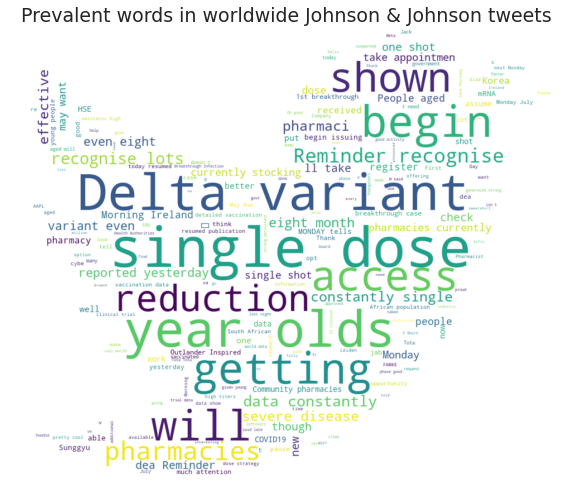

In [62]:
try:
    '''
    https://www.datacamp.com/community/tutorials/wordcloud-python
    '''
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    %matplotlib inline

    # Generate the word cloud from the tweets with mask
    stopwords = STOPWORDS.update(['Janssen vaccine', 'JNJ', 'Johnson', 'Janssen', 'Pfizer', 'vaccine', 'vaccines', 'amp', 'J', 's'])
    stopwords = set(STOPWORDS)
    cloud_tweets = WordCloud(background_color="white", stopwords=stopwords, mask=twird_mask, width=twird_mask.shape[1],
                   height=twird_mask.shape[0]).generate(text_string1) 
    plt.figure(figsize=(10,10))
    plt.imshow(cloud_tweets, interpolation='bilinear')
    plt.axis("off")
    plt.title('Prevalent words in worldwide Johnson & Johnson tweets', fontsize=19)
    plt.show()

    # Save to png file 
    cloud_tweets.to_file('/home/jovyan/dp2-2021s-teamboehm/Test/TestCombine/wordcloud_worldwide_JnJ.png')
except: 
    print("Unexpected error:", sys.exc_info()[0])

In [63]:
try:
    # Collecting text into a single string for WordCloud
    dataCollect2 = df_moderna.collect()
    #print(type(dataCollect2))
    #print(dataCollect2)

    text2 = []
    for row in dataCollect2:
        text2.append(row['text'])

    text_string2 = '\n'.join(text2)
    #print(type(text_string2))
    #print(text_string2)
except: 
    print("Unexpected error:", sys.exc_info()[0])

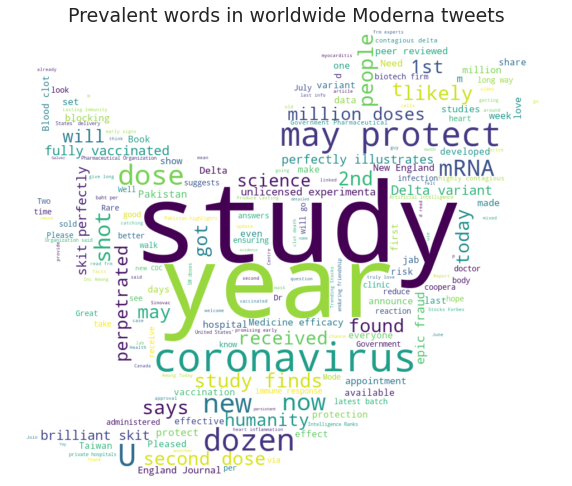

In [64]:
try:
    '''
    https://www.datacamp.com/community/tutorials/wordcloud-python
    '''
    # Generate the word cloud from the tweets with mask
    stopwords = STOPWORDS.update(['COVID', 'Pfizer', 'BioNTech', 'Moderna', 'Covid vaccine', 'vaccine', 'vaccines', 'amp'])
    stopwords = set(STOPWORDS)
    cloud_tweets = WordCloud(background_color="white", stopwords=stopwords, mask=twird_mask, width=twird_mask.shape[1],
                   height=twird_mask.shape[0]).generate(text_string2) 
    plt.figure(figsize=(10,10))
    plt.imshow(cloud_tweets, interpolation='bilinear')
    plt.axis("off")
    plt.title('Prevalent words in worldwide Moderna tweets', fontsize=19)
    plt.show()

    # Save to png file 
    cloud_tweets.to_file('/home/jovyan/dp2-2021s-teamboehm/Test/TestCombine/wordcloud_worldwide_moderna.png')
except: 
    print("Unexpected error:", sys.exc_info()[0])

In [65]:
try:
    # Collecting text into a single string for WordCloud
    dataCollect3 = df_pfizer.collect()
    #print(type(dataCollect3))
    #print(dataCollect3)

    text3 = []
    for row in dataCollect3:
        text3.append(row['text'])

    text_string3 = '\n'.join(text3)
    #print(type(text_string3))
    #print(text_string3)
except: 
    print("Unexpected error:", sys.exc_info()[0])

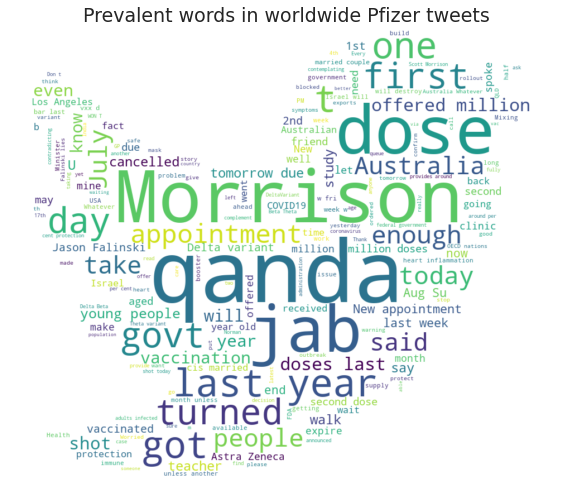

In [66]:
try:
    '''
    https://www.datacamp.com/community/tutorials/wordcloud-python
    '''
    # Generate the word cloud from the tweets with mask
    stopwords = STOPWORDS.update(['Pfizer', 'BioNTech', 'AZ', 'AstraZeneca', 'vaccine', 'vaccines', 'Covid', 'amp', 'Covid Vaccine', 's'])
    stopwords = set(STOPWORDS)
    cloud_tweets = WordCloud(background_color="white", stopwords=stopwords, mask=twird_mask, width=twird_mask.shape[1],
                   height=twird_mask.shape[0]).generate(text_string3) 
    plt.figure(figsize=(10,10))
    plt.imshow(cloud_tweets, interpolation='bilinear')
    plt.axis("off")
    plt.title('Prevalent words in worldwide Pfizer tweets', fontsize=19)
    plt.show()

    # Save to png file 
    cloud_tweets.to_file('/home/jovyan/dp2-2021s-teamboehm/Test/TestCombine/wordcloud_worldwide_Pfizer.png')
except: 
    print("Unexpected error:", sys.exc_info()[0])

In [67]:
try:
    # Collecting text into a single string for WordCloud
    dataCollect4 = df_astraz.collect()
    #print(type(dataCollect4))
    #print(dataCollect4)

    text4 = []
    for row in dataCollect4:
        text4.append(row['text'])

    text_string4 = '\n'.join(text4)
    #print(type(text_string4))
    #print(text_string4)
except: 
    print("Unexpected error:", sys.exc_info()[0])

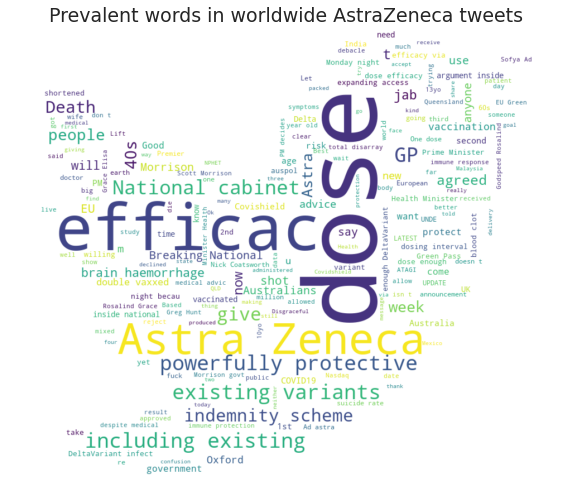

In [68]:
try:
    '''
    https://www.datacamp.com/community/tutorials/wordcloud-python
    '''
    # Generate the word cloud from the tweets with mask
    stopwords = STOPWORDS.update(['AstraZeneca', 'AstraZeneca vaccine', 'Astra Zeneca', 'vaccine', 'vaccines', 'amp', 's'])
    stopwords = set(STOPWORDS)
    cloud_tweets = WordCloud(background_color="white", stopwords=stopwords, mask=twird_mask, width=twird_mask.shape[1],
                   height=twird_mask.shape[0]).generate(text_string4) 
    plt.figure(figsize=(10,10))
    plt.imshow(cloud_tweets, interpolation='bilinear')
    plt.axis("off")
    plt.title('Prevalent words in worldwide AstraZeneca tweets', fontsize=19)
    plt.show()

    # Save to png file 
    cloud_tweets.to_file('/home/jovyan/dp2-2021s-teamboehm/Test/TestCombine/wordcloud_worldwide_AstraZeneca.png')
except: 
    print("Unexpected error:", sys.exc_info()[0])